# Descripción del proyecto

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.


# Servicios de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

## Descripción de los datos

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.

## Diccionario de datos.


<table>
     <caption style="text-align:center">contract</caption>
  <thead>
    <tr>
      <th>Field</th>
      <th>Type</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>customerID</td>  
      <td>string</td>  
      <td>Codigo unico de identificacion de usuario</td> 
    </tr>
      <tr>
        <td>BeginDate</td> 
        <td>datetime</td>  
        <td>Fecha de inicio de contrato</td> 
    </tr>
    <tr>
      <td>EndDate</td>
      <td>datetime</td> 
      <td>Fecha de finalizacion de contrato</td> 
    </tr>
    <tr>
      <td>Type</td>
      <td>string</td> 
      <td>Tipo de contrato (mensual, 1 año, 2 años)</td>
    </tr>
    <tr>
      <td>PaperlessBilling</td>
      <td>boolean</td> 
      <td>Envio de facturacion via electronica</td> 
    </tr>
    <tr>
      <td>PaymentMethod</td>
      <td>string</td>  
      <td>Metodo de pago configurado(Cheque, tarjeta de credito(automatico), cuenta bancaria(automatico), pago electronico)</td>
    </tr>
    <tr> 
      <td>MonthlyCharges</td>
      <td>float</td> 
      <td>Cargos adicionales por servicios no contratados</td> 
    </tr>
    <tr> 
      <td>TotalCharges</td> 
      <td>float</td>
      <td>Cargo total</td>
    </tr>
    <tr> 
      <td>Balance</td> 
      <td>float</td>  
      <td>saldo de la cuenta</td>
    </tr>
  <tbody>
</table> 

<br><br>

<table>
     <caption style="text-align:center">internet</caption>
  <thead>
    <tr>
      <th>Field</th>
      <th>Type</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>customerID</td>  
      <td>string</td>  
      <td>Codigo unico de identificacion de usuario</td> 
    </tr>
    <tr>
      <td>InternetService</td>  
      <td>string</td>  
      <td>Tipo de internet contratado(DLS, Fiber Optic)</td> 
    </tr>
    <tr>
      <td>OnlineSecurity</td>  
      <td>boolean</td>  
      <td>Proteccion de sitios maliciosos</td> 
    </tr>
    <tr>
      <td>OnlineBackup</td>  
      <td>boolean</td>  
      <td>Almacenamiento de archivos en cloud</td> 
    </tr>
    <tr>
      <td>DeviceProtection</td>  
      <td>boolean</td>  
      <td>Proteccion de dispositivos Malware Antivirus</td> 
    </tr>
    <tr>
      <td>TechSupport</td>  
      <td>boolean</td>  
      <td>Soporte tecnico</td> 
    </tr>
    <tr>
      <td>StreamingTV</td>  
      <td>boolean</td>  
      <td>Streaming TV</td> 
    </tr>
    <tr>
      <td>StreamingMovies</td>  
      <td>boolean</td>  
      <td>Streaming Movies</td> 
    </tr>

  <tbody>
</table> 


<br><br>

<table>
     <caption style="text-align:center">Personal</caption>
  <thead>
    <tr>
      <th>Field</th>
      <th>Type</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>customerID</td>  
      <td>string</td>  
      <td>Codigo unico de identificacion de usuario</td> 
    </tr>
    <tr>
      <td>gender</td>  
      <td>string</td>  
      <td>Genero que identifica al usuario</td> 
    </tr>
    <tr>
      <td>SeniorCitizen</td>  
      <td>boolean</td>  
      <td>Unknown</td> 
    </tr>
    <tr>
      <td>Partner</td>  
      <td>boolean</td>  
      <td>Unknown</td> 
    </tr>
    <tr>
      <td>Dependents</td>  
      <td>boolean</td>  
      <td>Unknown</td> 
    </tr>
  <tbody>
</table> 

<br><br>

<table>
     <caption style="text-align:center">Phone</caption>
  <thead>
    <tr>
      <th>Field</th>
      <th>Type</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>customerID</td>  
      <td>string</td>  
      <td>Codigo unico de identificacion de usuario</td> 
    </tr>
    <tr>
      <td>MultipleLines</td>  
      <td>boolean</td>  
      <td>Geerifica si tiene mas de un servicio</td> 
    </tr>
  <tbody>
</table> 





## Limpieza de datos

### Carga de librerias

In [119]:
%load_ext autoreload
%autoreload 2
from controller import normalization as norm
from controller import machineLearning as ml
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec

import seaborn as sns

from tqdm.auto import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Carga de informacion

In [120]:
PATH_FILES = os.path.join(os.getcwd(), "files")

In [121]:
list_files = norm.import_list_csv(PATH_FILES)
df_names = ['df_contract', 'df_internet', 'df_personal', 'df_phone']

#### Verificacion y Limpieza de datos

In [122]:
list_files[df_names[0]].head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [123]:
list_files[df_names[0]]['EndDate'] = norm.adjust_data_time(list_files[df_names[0]]['EndDate'].replace('No',''), format_time='%Y-%m-%d %H:%M:%S')
list_files[df_names[0]]['BeginDate'] = norm.adjust_data_time(list_files[df_names[0]]['BeginDate'], format_time='%Y-%m-%d')
list_files[df_names[0]]['PaperlessBilling'] = list_files[df_names[0]]['PaperlessBilling'].apply(lambda x: 1 if x == 'Yes' else 0)
list_files[df_names[0]]['TotalCharges'] = norm.pd.to_numeric(list_files[df_names[0]]['TotalCharges'],errors='coerce').fillna(0)    

El ajuste de fechas nos ayudara a verificar espacios de tiempo en que los usuarios dejan los servicios, el cambio de valores de str a 0 y 1 ayuda al procesamiento de datos a futuro.

In [124]:
list_files[df_names[1]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [125]:
list_files[df_names[1]].head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [126]:
for column in list_files[df_names[1]].columns:
    if column not in ['customerID', 'InternetService']:
        if list_files[df_names[1]][column].dtype == 'object':
            list_files[df_names[1]][column] = list_files[df_names[1]][column] \
                                                    .apply(lambda x: 1 if x == 'Yes' else 0)

In [127]:
list_files[df_names[2]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [128]:
list_files[df_names[2]].sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents
6066,5349-IECLD,Male,0,No,No
2801,1017-FBQMM,Female,0,Yes,Yes
6234,5995-LFTLE,Male,0,No,No
1639,4690-LLKUA,Male,1,No,No
4488,3714-JTVOV,Female,1,Yes,No
1401,5419-CONWX,Female,1,No,No
4016,7754-IXRMC,Female,0,No,No
2355,5067-WJEUN,Male,0,Yes,Yes
6978,6439-PKTRR,Female,0,Yes,Yes
6805,4323-OHFOW,Female,1,Yes,No


In [129]:
list_files[df_names[2]]['gender'] = list_files[df_names[2]]['gender'].apply(lambda x: 1 if x == 'Male' else 0)
list_files[df_names[2]]['Partner'] = list_files[df_names[2]]['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)
list_files[df_names[2]]['Dependents'] = list_files[df_names[2]]['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)


In [130]:
list_files[df_names[3]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [131]:
list_files[df_names[3]].head(10)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


In [132]:
list_files[df_names[3]]['MultipleLines'] = list_files[df_names[3]]['MultipleLines'].apply(lambda x: 1 if x == 'Yes' else 0).astype(bool)

#### Unificacion de datos

Una vez normalizados los datos unificamos los datos en una tabla maestra

In [133]:
main_df = list_files[df_names[0]].copy()
list_files.pop(df_names[0])
merge_files = list(list_files.values())

In [134]:
df_data = norm.standarize_titles(norm.merge_list_dataframe(main_df,merge_files,'customerID'))

Se agregan valores calculados para su analisis

In [135]:
df_data['timeservicedays'] = (df_data['enddate'] - df_data['begindate']).dt.days
df_data['objective'] = df_data['enddate'].apply(lambda x: 0 if norm.pd.notnull(x) else 1)
df_data['beginmonth'] = df_data['begindate'].dt.month
df_data['beginyear'] = df_data['begindate'].dt.year

In [136]:
df_data.head(5)  

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender,seniorcitizen,...,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,timeservicedays,objective,beginmonth,beginyear
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,1,Electronic check,29.85,29.85,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,NaN,1,1,2020
1,5575-GNVDE,2017-04-01,NaT,One year,0,Mailed check,56.95,1889.50,1,0,...,1.0,0.0,1.0,0.0,0.0,0.0,NaN,1,4,2017
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,1,Mailed check,53.85,108.15,1,0,...,1.0,1.0,0.0,0.0,0.0,0.0,61.0,0,10,2019
3,7795-CFOCW,2016-05-01,NaT,One year,0,Bank transfer (automatic),42.30,1840.75,1,0,...,1.0,0.0,1.0,1.0,0.0,0.0,NaN,1,5,2016
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,1,Electronic check,70.70,151.65,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,61.0,0,9,2019


## EDA

Los graficos se desarrollaron en streamlit para especificaciones de cambios y analisis detallados.

Streamlit https://finalprojecttripleten-67qfr5pypoynk2npwzn5ew.streamlit.app/

Iniciamos con la evaluacion de los datos que muestran una distribucion casi homohenea para quienes reciben su factura via electronica a quienes no, se obverva una participacion mas activa para los planes que son mes a mes frente a los de largo plazo como lo son de 1 y 2 años.

De igual manera existe una clara preferencia a un pago electronico que respaldaria los datos de los usuarios quienes prefieren recibir sus facturas via electronica o tienen configurado su pago de forma automatica.

Al evaluar la informacion distribuida por tipo de pago y tipo de plan se ve un cambio en la distribucion observando que solo para el pago electronico mes a mes es mucho mas frecuente, al evaluar que datos se encuentran fuera de la media, las sospechas fueron confirmadas datos con comportamientos atipicos.

Con el objetivo de identificar el foco de la alerta, observamos que los usuarios que:
 - Los de pago mensual tienden a irse alrededor de 4 meses despues de cumplir el año
 - los de un año al alrededor de 7 meses despues de cumplir el año. 
 - los de dos años no cumplen con su totalidad, sin embargo, la cantidad de clientes que abandonaron el plan versus los activos no representa un impacto negativo respecto al plan de 2 años.

Podemos en primera instancia concluir que el tiempo de maximo de retencion es de alrededor de 1 y medio para cualquiera de los planes.

<Axes: xlabel='beginyear', ylabel='customerid'>

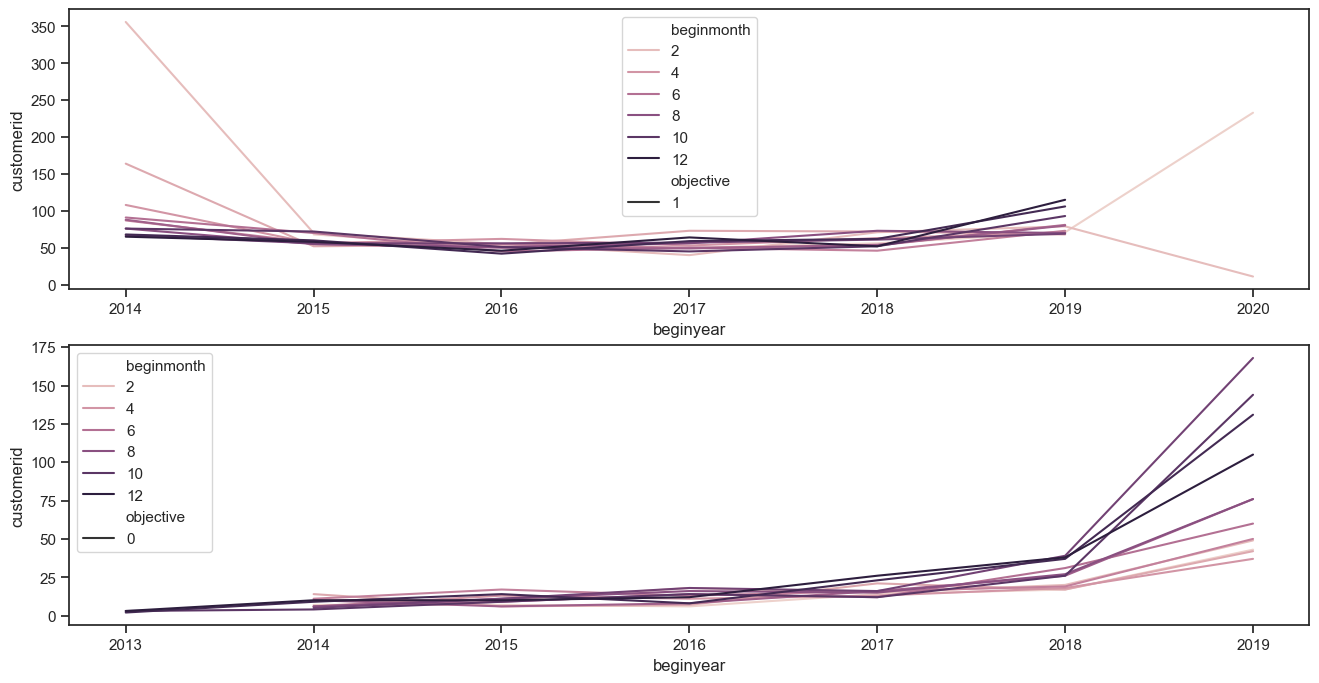

In [137]:
fig2 = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(2, 2)

data = df_data.loc[:,['beginyear','beginmonth','customerid','objective']] \
    .sort_values(['beginyear','beginmonth'],ascending=True) \
    .groupby(by=['beginyear','beginmonth','objective'],as_index=False) \
    .count()
    
ax = fig2.add_subplot(gs[0,:3])    
sns.lineplot(data=data.query('objective==1'),x='beginyear',y='customerid',hue='beginmonth',style= 'objective',ax=ax)
ax = fig2.add_subplot(gs[1,:3]) 
sns.lineplot(data=data.query('objective==0'),x='beginyear',y='customerid',hue='beginmonth',style= 'objective',ax=ax)     

Los datos muestran que los datos de clientes activos estan en la brecha de 2020 en adelante, esto podria ser importante en caso de que necesitemos sobrecargar los datos para balancear el historico de 5 años.  

## Entrenamiento de modelos predictivos

In [138]:
RANDOM_STATE = 42

### Identificacion de datos de entrenamiento y validacion 

In [ ]:
df_data['noserviceactive']= df_data.loc[:,['onlinesecurity', 'onlinebackup', 'deviceprotection','techsupport', 'streamingtv', 'streamingmovies']].sum(axis=1)

In [146]:
train, valid = ml.train_test_split(df_data, test_size=0.2, random_state=RANDOM_STATE, stratify=df_data['objective'],shuffle=True)
train['ds_part'] = 'train'
valid['ds_part'] = 'valid'

In [147]:
df_data['ds_part'] = norm.np.where((df_data['customerid'].isin(train['customerid'])), 'train', 'valid')

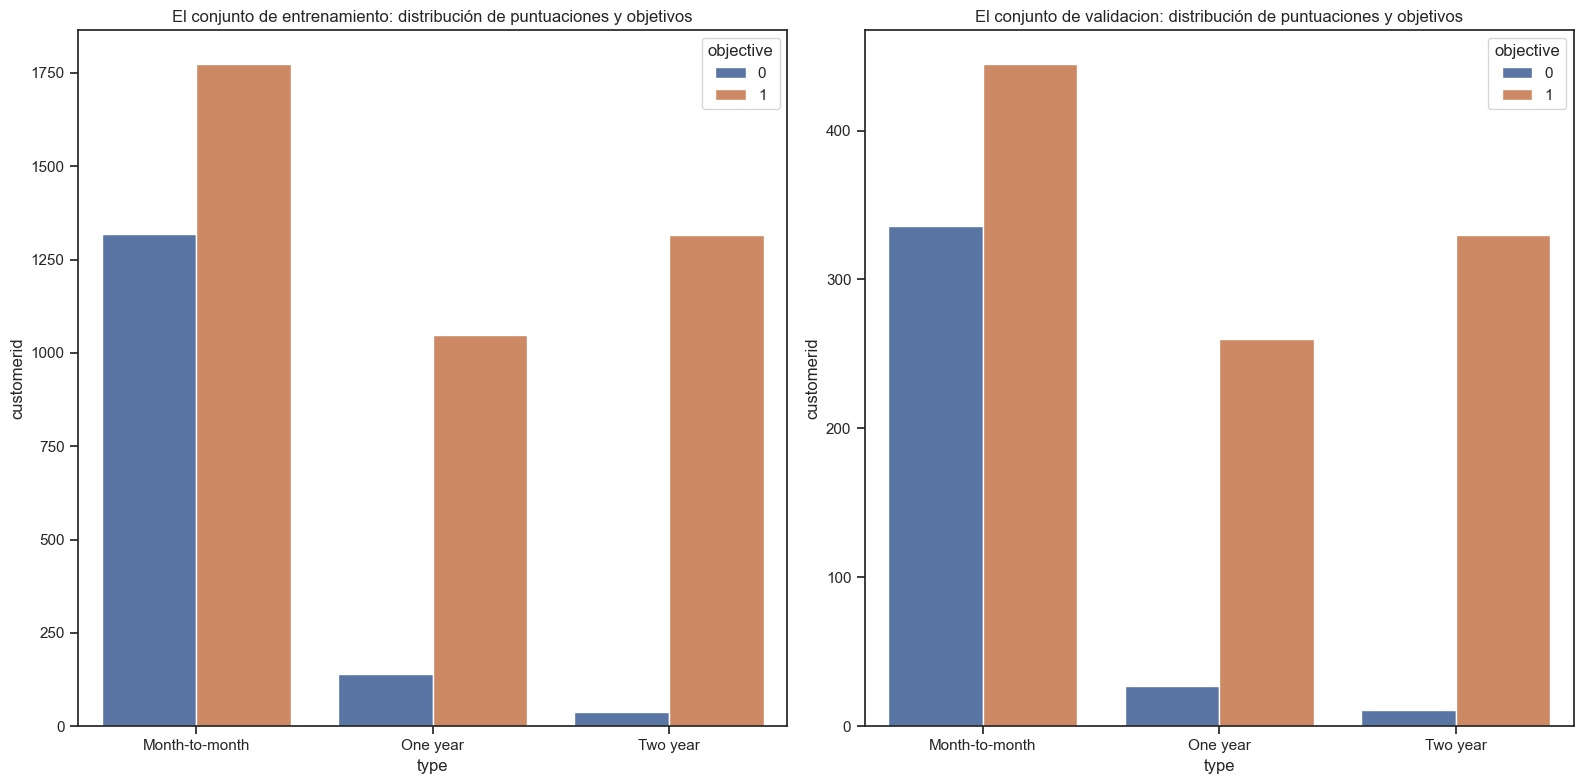

In [148]:
fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(2, 2)

ax = fig.add_subplot(gs[:,0]) 
dft = df_data[df_data['ds_part'] == "train"].loc[:,['type','objective','customerid']]\
                                        .groupby(by=['type','objective'],as_index=False)\
                                        .count()\
                                        .sort_values(['type','objective'],ascending=True)
sns.barplot(data=dft, x='type', y='customerid', hue='objective')\
    .set(title='El conjunto de entrenamiento: distribución de puntuaciones y objetivos')   

ax = fig.add_subplot(gs[:,1])
dft = df_data[df_data['ds_part'] != "train"].loc[:,['type','objective','customerid']]\
                                        .groupby(by=['type','objective'],as_index=False)\
                                        .count()\
                                        .sort_values(['type','objective'],ascending=True)
sns.barplot(data=dft, x='type', y='customerid', hue='objective')\
    .set(title='El conjunto de validacion: distribución de puntuaciones y objetivos')  

fig.tight_layout()

La distribucion de los datos se ve balanceada despues de realizar el correspondiente split. Esto nos ayuda a evitar desbalaceos en el proceso de analisis y prueba.

#### Transformacion de datos escalables.

Eliminacion de columnas que no aportan o fueron diseñadas a modo de exploracion y tienen informacion relacionada al objetivo (timeservicedays,enddate)

In [149]:
drop_columns=['onlinesecurity', 'onlinebackup', 'deviceprotection','techsupport', 'streamingtv', 'streamingmovies','customerid','gender','seniorcitizen', 'partner', 'dependents', 'ds_part','enddate','beginyear','timeservicedays','beginmonth']

Verificacion de la proporcion de datos antes del escalamiento

In [150]:
df_data['ds_part'].value_counts()

ds_part
train    5634
valid    1409
Name: count, dtype: int64

Data de entrenamiento

In [151]:
df_target = df_data.query('ds_part == "train"')['objective']
df_traine = df_data.query('ds_part == "train"').drop(columns='objective')
df_traine = df_traine.drop(columns=drop_columns)
df_traine_scalated = ml.scaled(df_traine)

Data de validacion

In [152]:
df_target_valid = df_data.query('ds_part == "valid"')['objective']
df_valid = df_data.query('ds_part == "valid"').drop(columns='objective')
df_valid = df_valid.drop(columns=drop_columns)
df_valid_scalated = ml.scaled(df_valid)

#### Identificacion correlacion entre datos

<Axes: >

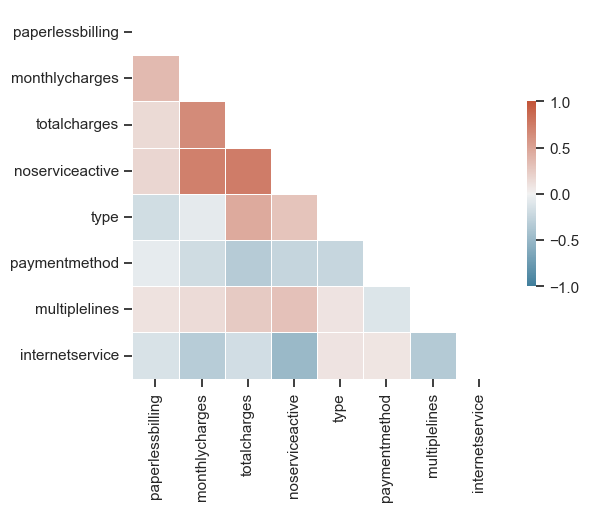

In [153]:
df_corr=df_traine_scalated.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = norm.np.triu(norm.np.ones_like(df_corr, dtype=bool))
sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Se ven observan importantes entre los cargos mensuales y tipo de pago configurado con los servicios ofrecidos por la entidad(Streaming, techsupport, ETC.).

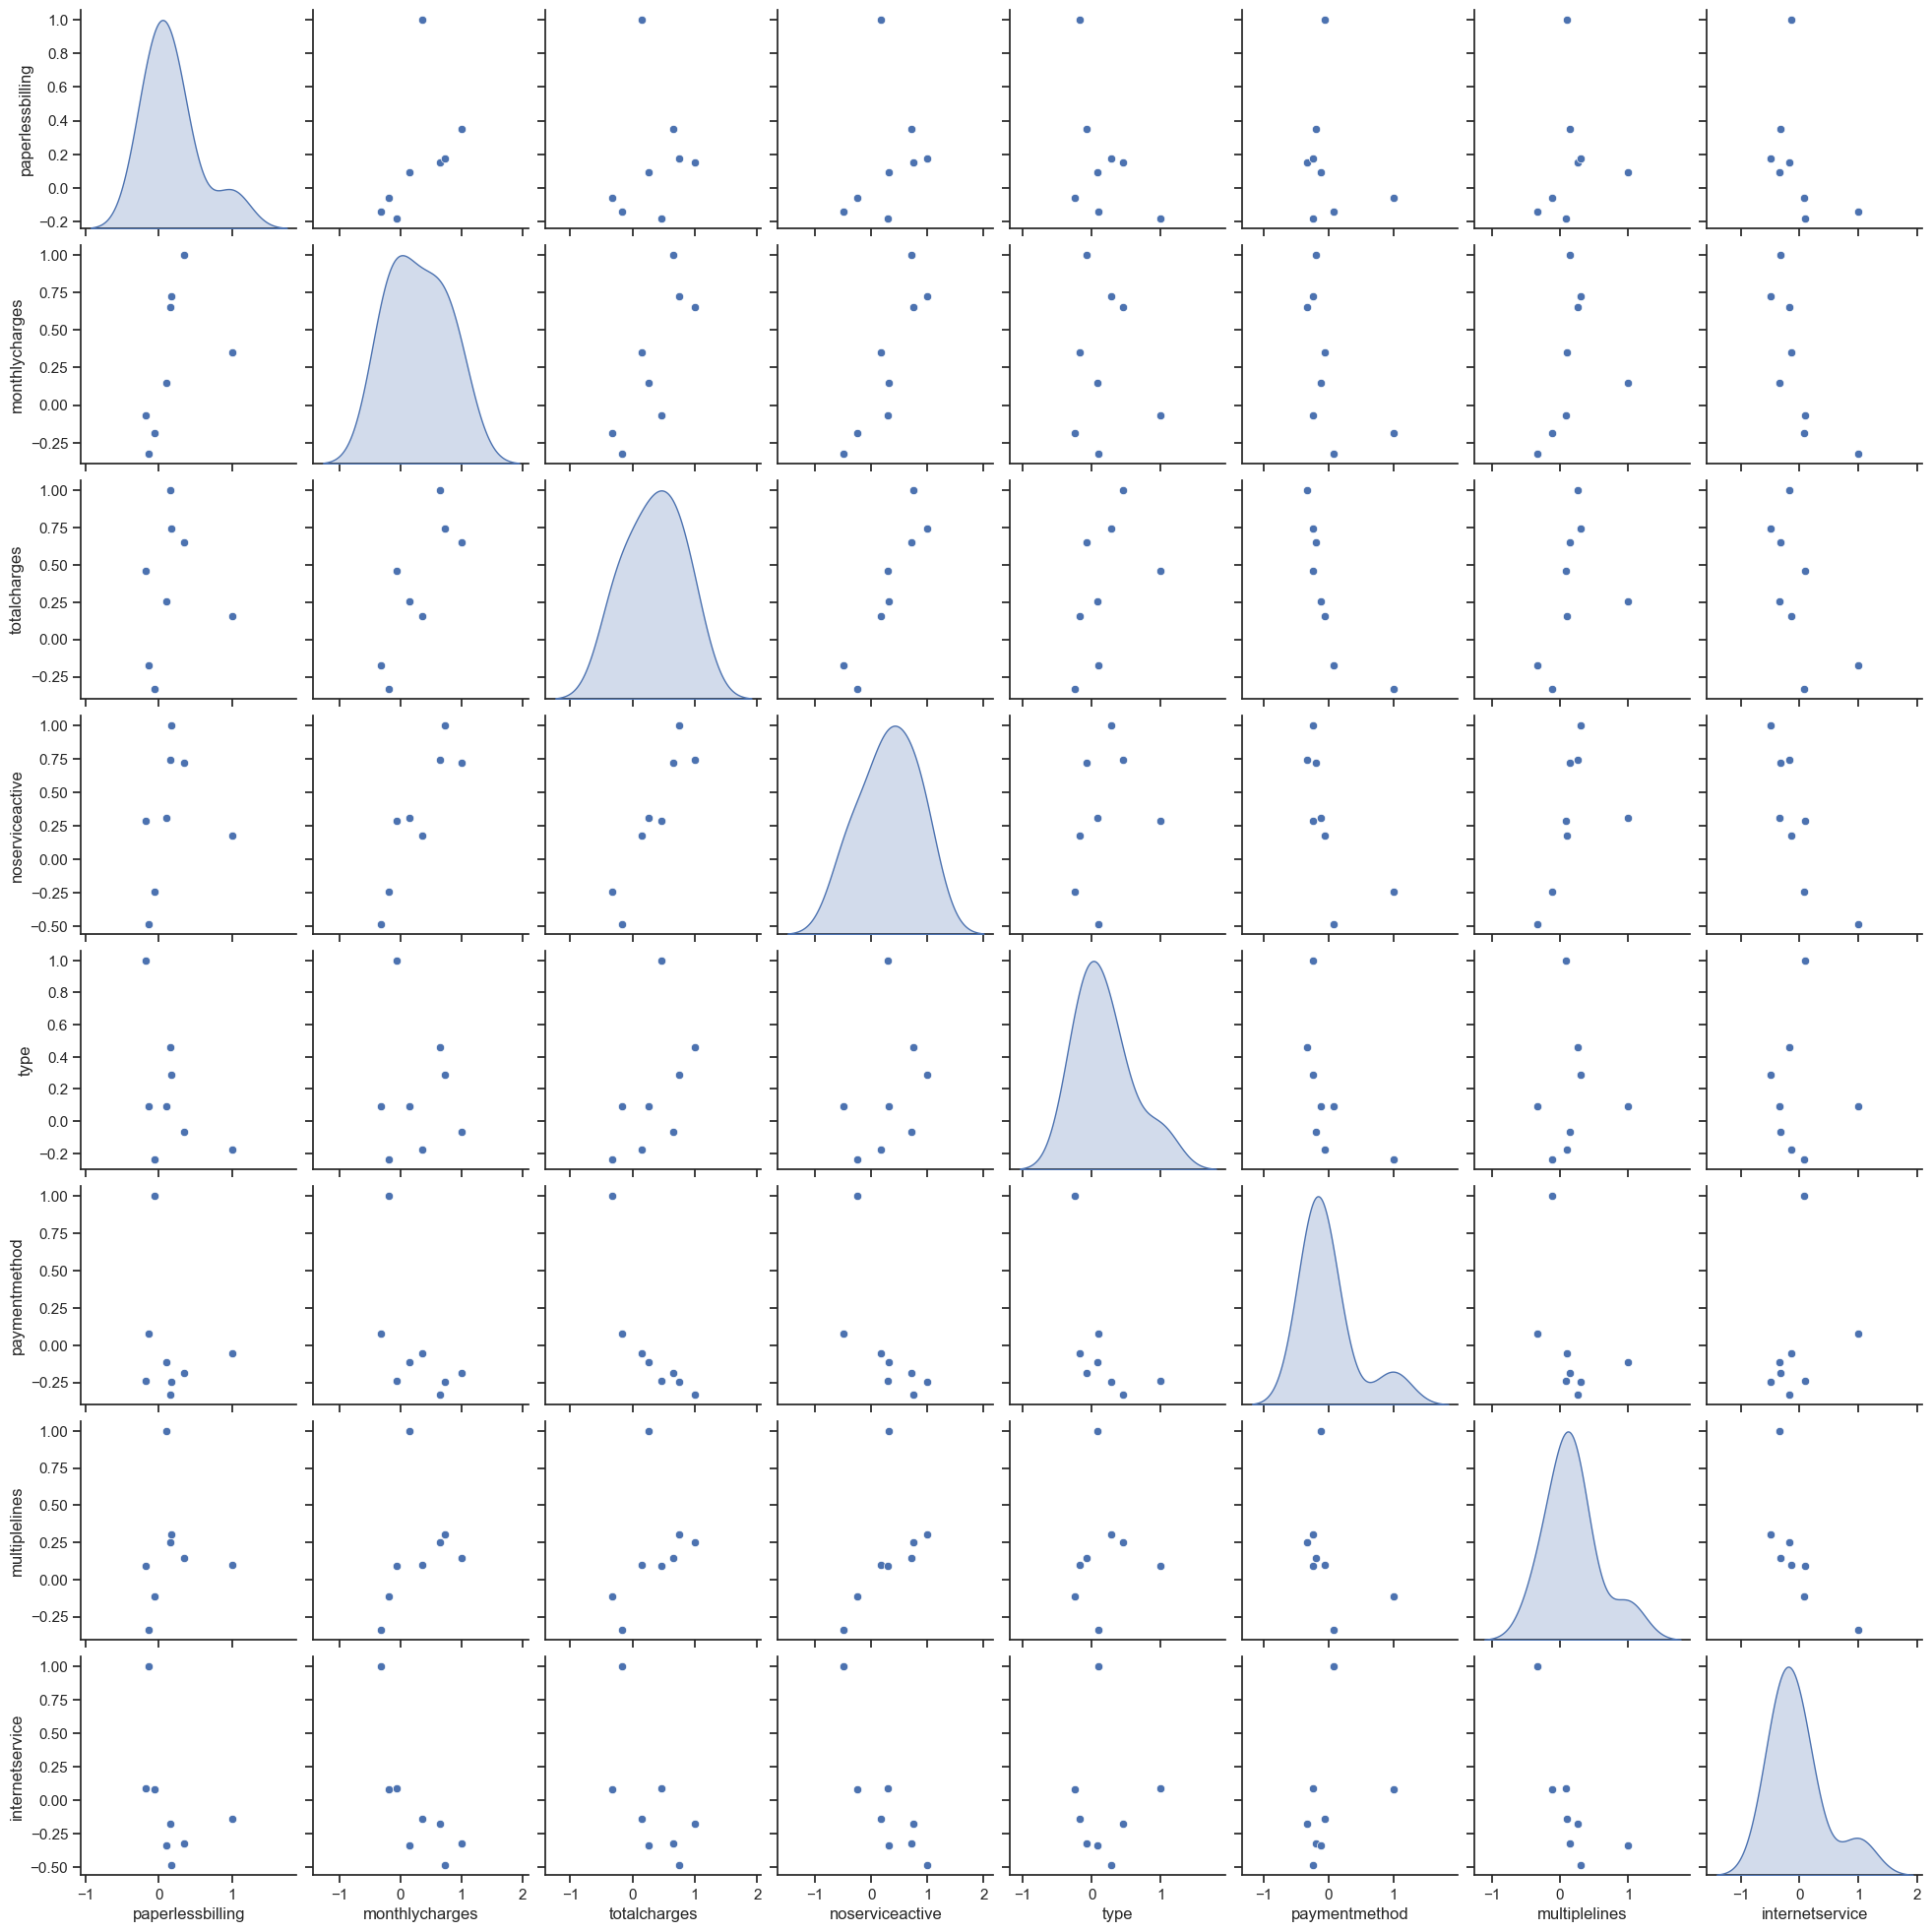

In [154]:
sns.set_theme(style="ticks")
sns.pairplot(df_corr.select_dtypes(include=['int64','float64']), diag_kind='kde')

Los usuarios que tienen configurado su factura via electronica y  multilinea tienen una mayor representacion respecto a los que no.

#### Descenso Gradiente

In [155]:
xgboostregressor=ml.XgboostRegressor(df_traine_scalated,df_target,'gradient_boosting',RANDOM_STATE)

In [156]:
ml.evalua_clasificacion_binaria(df_target_valid,xgboostregressor['model'].predict(df_valid_scalated))

VN: 137, FN: 237 
FP: 67, VP: 968
Exactitud:  78.42%
Precisión:  80.33%
Especificidad:  67.16%
Exhaustividad  93.53%
F1 score:  86.43%


          train  test
Accuracy   0.84  0.78
F1         0.89  0.86
APS        0.96  0.93
ROC AUC    0.90  0.82


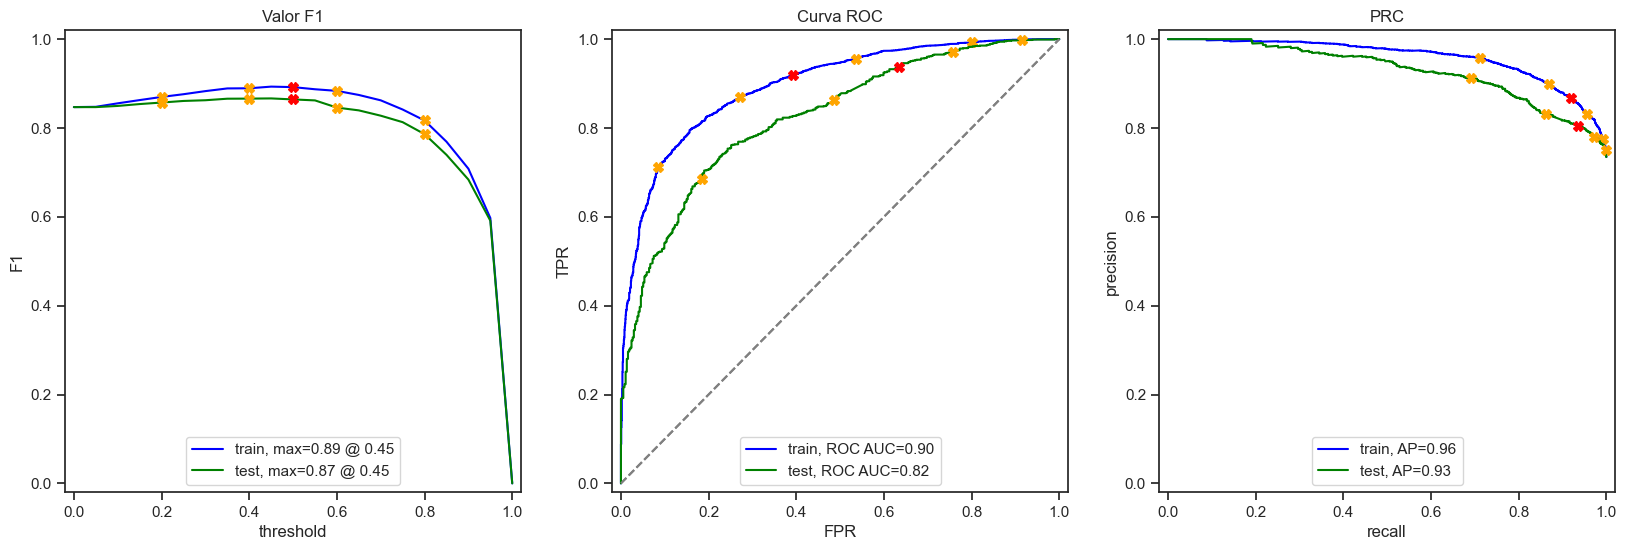

In [157]:
ml.evaluate_model(xgboostregressor['model'], df_traine_scalated, df_target, df_valid_scalated, df_target_valid)

La primera validacion muestra una buena señal, ROC AUC tiene un buen score y los datos de train y test no tienen una gran diferencia. Esto nos indica una precision de 8/10 bastante cercana a la meta.

### Modificar los pesos para evaluar que tanto mejora el modelo

Cambiar los pesos ayuda a evaluar cambios.

In [158]:
ml.xgb_gradient_boosting.set_params(min_child_weight=5)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0.1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1500, n_jobs=None,
              num_parallel_tree=None, ...)

In [159]:
xgboostregressor2=ml.XgboostRegressor(df_traine_scalated,df_target,'gradient_boosting',RANDOM_STATE)
ml.evalua_clasificacion_binaria(df_target_valid,xgboostregressor2['model'].predict(df_valid_scalated))

VN: 139, FN: 235 
FP: 63, VP: 972
Exactitud:  78.85%
Precisión:  80.53%
Especificidad:  68.81%
Exhaustividad  93.91%
F1 score:  86.71%


          train  test
Accuracy   0.83  0.79
F1         0.89  0.87
APS        0.96  0.93
ROC AUC    0.89  0.83


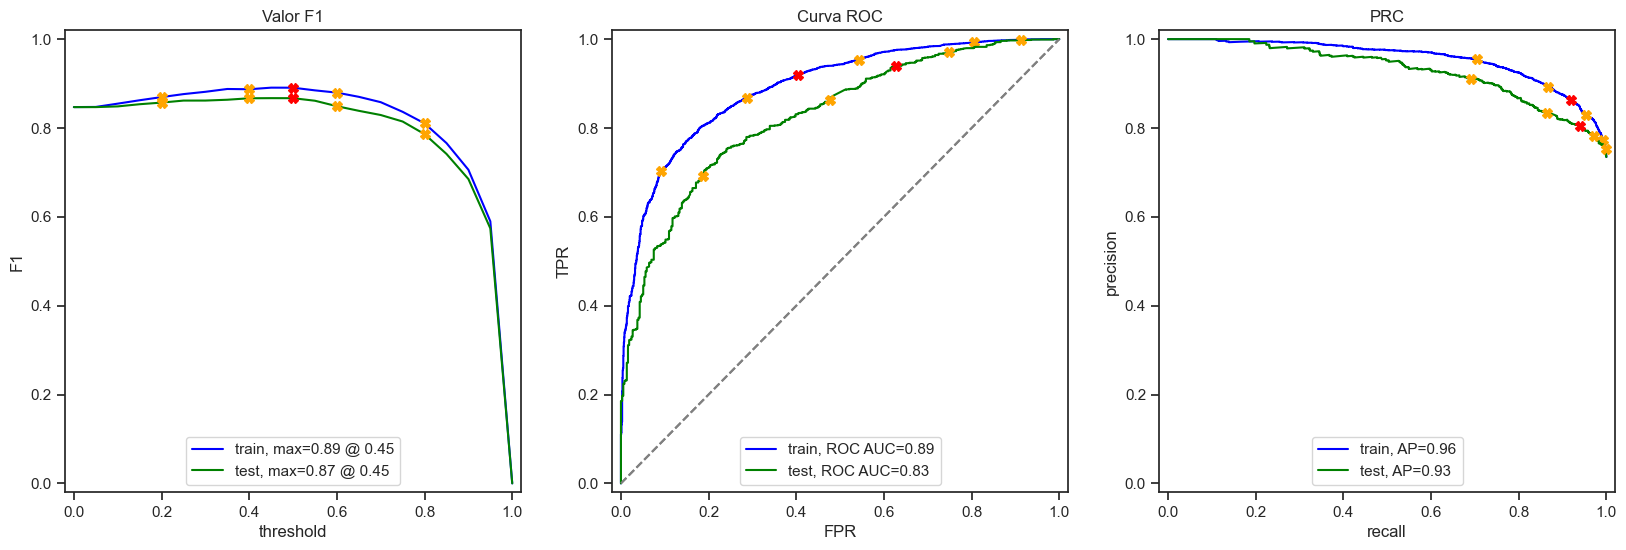

In [160]:
ml.evaluate_model(xgboostregressor['model'], df_traine_scalated, df_target, df_valid_scalated, df_target_valid)

Si bien el modelo no sufrio cambios importantes, tampoco mejoro la brecha entre los valores entrenados y los valores de evaluacion.

Dado que nuestro modelo esta sesgado en gran mayoria a los pagos mensuales, vale la pena evaluar si al generar categorias con mayor impacto en usuarios de corto plazo sobre las de largo plazo, es capaz de reducir ruido que estos pueden generar en el modelo. Aun cuando el modelo parece balanceado, estos datos pueden indicar que son capaces de predecir que usuario puede permanecer cuando este tiene contrato de largo plazo con facilidad dado que estos puntualmente tienen una tendencia a no cancelar su servicio pero no con la misma veracidad cuando son de corto plazo.

In [161]:
#Users with Short term tenure 
data_add_categorie = df_data.copy()
filter = df_data[df_data['type'] == "Month-to-month"]['customerid']

Al agregar esta variable buscamos que el modelo intente analizar los patrones con mayor detalle cambiando el peso, indice de aprendizaje y los valores en estimators.

In [162]:
data_add_categorie['longtenure'] = norm.np.where(~df_data['customerid'].isin(filter), 1, 0)
ml.xgb_gradient_boosting.set_params(min_child_weight=3,learning_rate=0.01,n_estimators=1500)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0.1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1500, n_jobs=None,
              num_parallel_tree=None, ...)

In [163]:
df_target = data_add_categorie.query('ds_part == "train"')['objective']
df_traine = data_add_categorie.query('ds_part == "train"').drop(columns='objective')
df_traine = df_traine.drop(columns=drop_columns)
df_traine = df_traine.drop(columns=['type'])
df_traine_scalated = ml.scaled(df_traine)

df_target_valid = data_add_categorie.query('ds_part == "valid"')['objective']
df_valid = data_add_categorie.query('ds_part == "valid"').drop(columns='objective')
df_valid = df_valid.drop(columns=drop_columns)
df_valid = df_valid.drop(columns=['type'])
df_valid_scalated = ml.scaled(df_valid)

In [164]:
xgboostregressor2=ml.XgboostRegressor(df_traine_scalated,df_target,'gradient_boosting',RANDOM_STATE)
ml.evalua_clasificacion_binaria(df_target_valid,xgboostregressor2['model'].predict(df_valid_scalated))

VN: 137, FN: 237 
FP: 61, VP: 974
Exactitud:  78.85%
Precisión:  80.43%
Especificidad:  69.19%
Exhaustividad  94.11%
F1 score:  86.73%


          train  test
Accuracy   0.84  0.79
F1         0.89  0.87
APS        0.96  0.93
ROC AUC    0.89  0.83


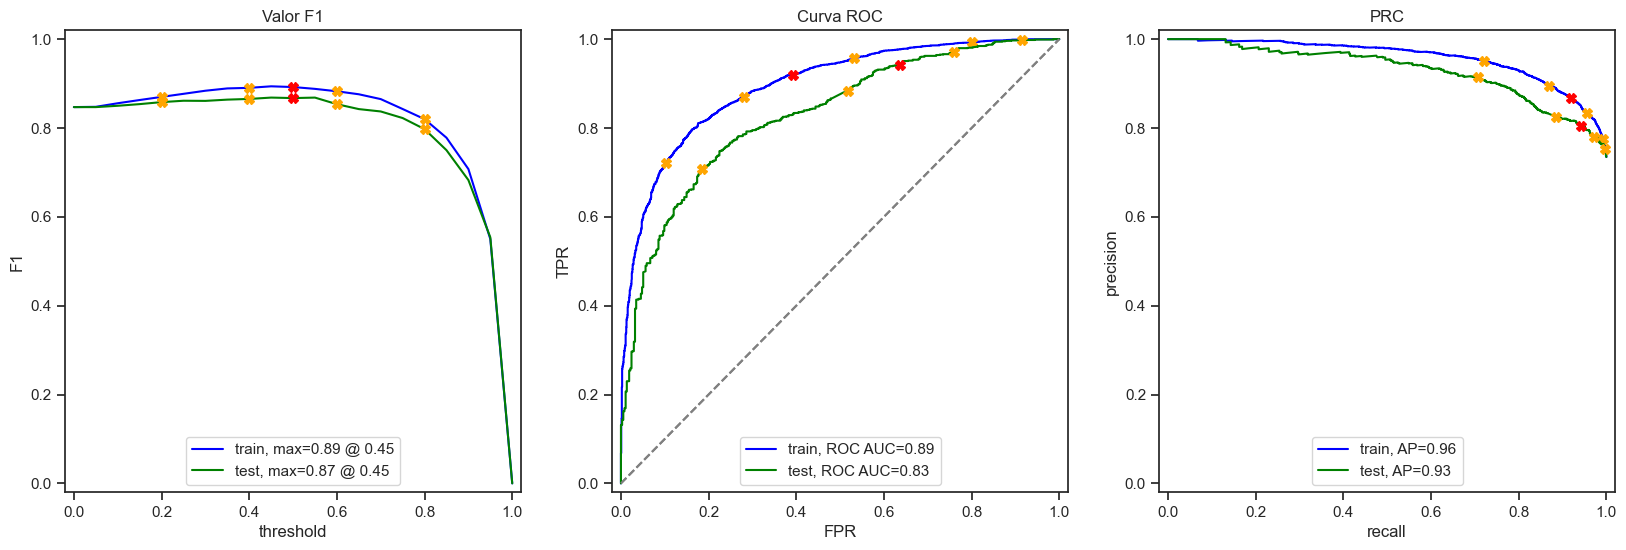

In [165]:
ml.evaluate_model(xgboostregressor['model'], df_traine_scalated, df_target, df_valid_scalated, df_target_valid)

Nuestras diferencias entre los predicho y el entrenamiento son ahora mas cercanos y podriamos decir que es un poco mas acertado respecto a lo esperado en dos tipos de categorias de contratos de corto y largo plazo.

## Concluciones

Se realizo la limpieza de datos sin problemas, se tomo la decision de automatizar la lectura y procesamiento de estos a fin de evitar lectura de informacion innecesaria y sobrecarga de los datos en multiples espacios de memoria.

Realizar la exploracion de datos aporto mucho a conocer la mejor manera abordar la necesidad de negocio, y fueron necesarios agregar campos calculados para evaluar con mayor certeza que papel juega cada variable y como se ven afectadas unas con respecto de otras. En este caso, los usuarios foco eran los usuarios con contrato a corto plazo dado que representanban un mayor reto de prediccion.

Comprender la disparidad de comportamiento de usuarios de contrato a corto plazo fue clave para entender como analizar el mejor modelo de prediccion, un modelo lineal no iba a representar un punto de partida oportuna dado que ya con los graficos caja nos mostraban una idea de como la media y mediana estaban distribuidas. El ruido de los datos mensuales y como sus datos atipicos podria afectar el analisis de patrones en el modelo nos indico que era oportuno crear variables adicionales centradas en observar los usuarios con contrato de corto plazo.

Finalmente, es una opcion viable usar el modelo xgboost con la variable adicional `longtenure` para favorecer una prediccion balancedada. En los test, el modelo fue capaz de predecir en un ~80% de precision que usuarios tomaran la decicion de cancelar su servicio, con un 87% de detectar falsos positivos, por lo que es clave nuestro ROC AUC indicando que es capaz de diferenciar a un 90% que clientes potencialmente tomaran la opcion de cancelar o permanecer con su servicio activo.